<a href="https://colab.research.google.com/github/BrunoMorastoni/Curso-Basico-Pandas-Py/blob/main/Aula_5_10_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exemplo de manipulação de dados usando o Panda Py***
Veremos: Inserção de dados, remoção de colunas, merge, gráficos.

Autor: Bruno Giuseppe Morastoni

Data: (09/02/23)



---



*Importando a biblioteca pandas*

In [ ]:
import pandas as pd

*Importando o Excel com pd.read_excel("arquivo")*

In [ ]:
combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

*Inserção de dados*

In [ ]:
combustiveis_df['Ativo'] = True
display(combustiveis_df.head())

*Criar uma coluna chamada "Obs" escrito "MELHOR CIDADE" quando a coluna Municipio for BLUMENAU-SC*

In [ ]:
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'BLUMENAU' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['BLUMENAU','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

*Calcular postos de gasolina por habitante na amostragem*

In [ ]:
ibge_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep =';')
ibge_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(ibge_df)

*Fazendo um Merge dos dois dataframes*

In [ ]:
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(ibge_df, how='inner', on=colunas)
display(merge_df)

In [ ]:
# Infos do merge_df #
merge_df.info()

*Apagando colunas vazias*

In [ ]:
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 967.2+ KB
None


In [ ]:
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(ibge_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     20634 non-null  object        
 1   Estado - Sigla     20634 non-null  object        
 2   Municipio          20634 non-null  object        
 3   Revenda            20634 non-null  object        
 4   CNPJ da Revenda    20634 non-null  object        
 5   Nome da Rua        20634 non-null  object        
 6   Numero Rua         20634 non-null  object        
 7   Complemento        3837 non-null   object        
 8   Bairro             20634 non-null  object        
 9   Cep                20634 non-null  object        
 10  Produto            20634 non-null  object        
 11  Data da Coleta     20634 non-null  datetime64[ns]
 12  Valor de Venda     20634 non-null  float64       
 13  Valor de Compra    0 non-null      float64       
 14  Unidad

In [ ]:
colunas = ['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda','Unidade de Medida', 'Bandeira', 'Ativo']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado - Sigla     20634 non-null  object 
 1   Municipio          20634 non-null  object 
 2   Revenda            20634 non-null  object 
 3   CNPJ da Revenda    20634 non-null  object 
 4   Complemento        3837 non-null   object 
 5   Valor de Compra    0 non-null      float64
 6   Obs                0 non-null      object 
 7   NumHabitantes2021  20634 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ MB
None


*Removendo Linhas duplicadas*

In [ ]:
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(ibge_df, how="inner", on=colunas)

display(merge_df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,260690


*Agrupando e contando a quantidade de postos na cidade*

In [ ]:
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()

postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)

postos_por_municipio_df.rename(columns={"Revenda": "Número de Postos"}, inplace=True)

display(postos_por_municipio_df)

,,,Regiao - Sigla,Número de Postos,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs
Estado - Sigla,Municipio,NumHabitantes2021,,,,,,,,,,,,,,,
AC,RIO BRANCO,419452,1090,1090,1090,1090,198,1090,1090,1090,1090,1090,0,1090,1090,1090,0
GO,GOIANIA,1555626,1667,1667,1667,1667,1369,1667,1667,1667,1667,1667,0,1667,1667,1667,0
MG,BELO HORIZONTE,2530701,827,827,827,827,32,827,827,827,827,827,0,827,827,827,0
MS,CAMPO GRANDE,916001,1606,1606,1606,1606,170,1606,1606,1606,1606,1606,0,1606,1606,1606,0
PR,CURITIBA,1963726,1291,1291,1291,1291,149,1291,1291,1291,1291,1291,0,1291,1291,1291,0
RJ,RIO DE JANEIRO,6775561,2445,2445,2445,2445,375,2445,2445,2445,2445,2445,0,2445,2445,2445,0
RN,NATAL,803739,1093,1093,1093,1093,270,1093,1093,1093,1093,1093,0,1093,1093,1093,0
RO,PORTO VELHO,548952,805,805,805,805,28,805,805,805,805,805,0,805,805,805,0
RS,PORTO ALEGRE,1492530,1142,1142,1142,1142,126,1142,1142,1142,1142,1142,0,1142,1142,1142,0


*Usando Gráficos*

(array([2.8000e+01, 6.7200e+02, 2.6370e+03, 3.8035e+04, 4.5319e+04,
        2.7049e+04, 4.1406e+04, 1.2733e+04, 4.8700e+02, 4.3000e+01]),
 array([2.849 , 3.4631, 4.0772, 4.6913, 5.3054, 5.9195, 6.5336, 7.1477,
        7.7618, 8.3759, 8.99  ]),
 <a list of 10 Patch objects>)

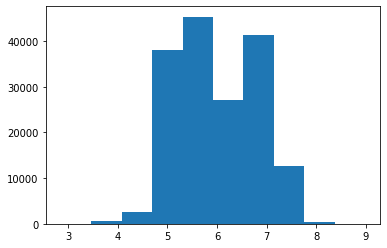

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combustiveis_df['Valor de Venda'])